In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd

In [2]:
# Create 2000-2019 dataframe
spotify_2000_2019_df = pd.read_csv("Resources/spotify_from_2000-2019.csv")

# Display sample data
spotify_2000_2019_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values,x_loc,y_loc,x_label,y_label,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_loc,y_loc),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

The r-squared is: 9.71359390579715e-05


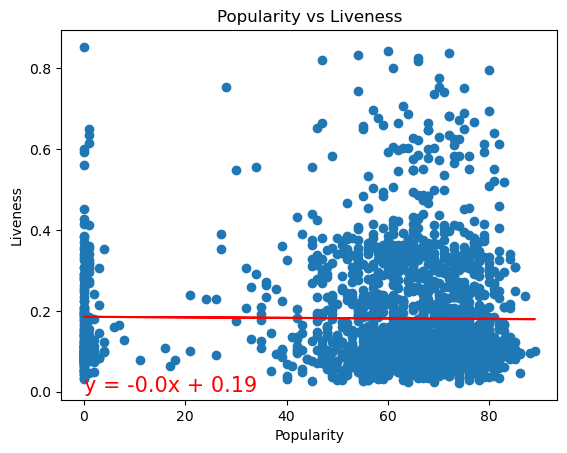

In [4]:
#Linear regression plot of popularity vs liveness
linear_reg_plot(spotify_2000_2019_df['popularity'],spotify_2000_2019_df['liveness'],0,0,"Popularity","Liveness", "Popularity vs Liveness")

The r-squared is: 0.00021971288836450942


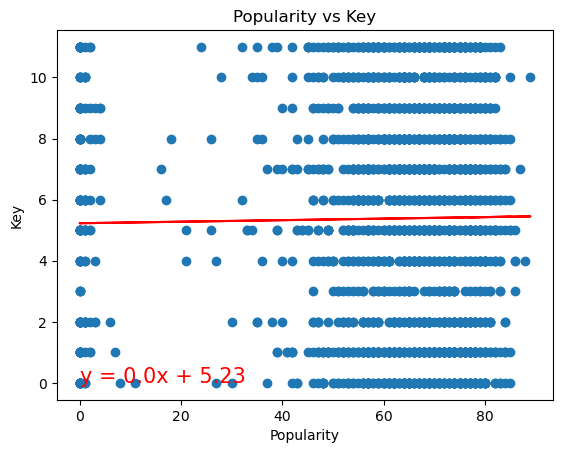

In [6]:
#Linear regression plot of popularity vs key
linear_reg_plot(spotify_2000_2019_df['popularity'],spotify_2000_2019_df['key'],0,0,"Popularity","Key", "Popularity vs Key")

In [8]:
#Create Df of songs with popularity over 50
popular_df = pd.DataFrame(spotify_2000_2019_df.loc[spotify_2000_2019_df['popularity']>=50,:])

# Display popular data
popular_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [28]:
#Labels for the keys because numbers are given
key_labels = ['C','C#/Db','D','D#/Eb','E',"F",'F#/Gb','G','G#/Ab','A','A#/Bb','B']

#Create pie chart values
values = [0,0,0,0,0,0,0,0,0,0,0,0]
for index,row in popular_df.iterrows():
    key = row['key']
    values[key]=values[key]+1

# The colors of each section of the pie chart
colors = ["lightgreen", "grey", "lightgreen", "grey","lightgreen", "grey","lightgreen", "grey","lightgreen", "grey","lightgreen", "grey",]

# Tells matplotlib to separate the "C#/Db" section from the others
explode = (0,0.1, 0, 0, 0,0,0,0,0,0,0,0)

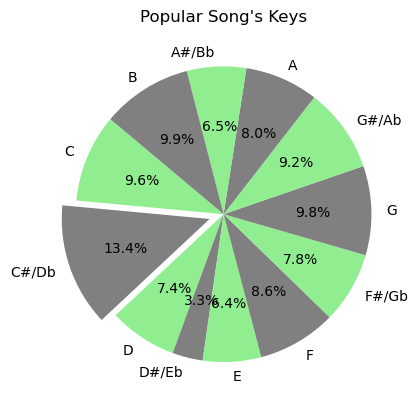

In [29]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(values, explode = explode, colors = colors, labels=key_labels,autopct="%1.1f%%",startangle=140)
plt.title("Popular Song's Keys")
plt.show()

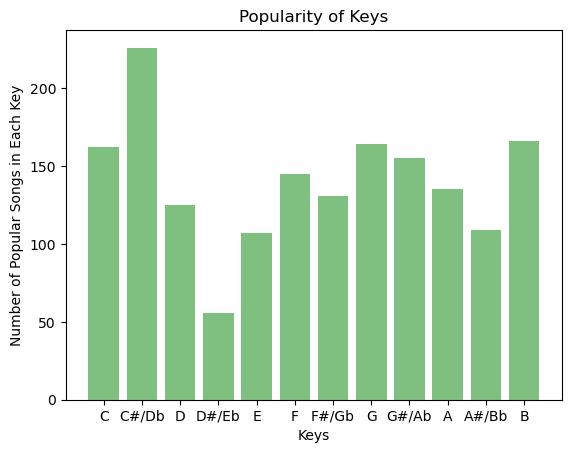

In [30]:
# Create an array that contains the number of users each language has
x_axis = np.arange(len(values))

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="center" to ensure our bars line up with our tick marks
plt.bar(x_axis, values, color='green', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, key_labels)

# Give our chart some labels and a tile
plt.title("Popularity of Keys")
plt.xlabel("Keys")
plt.ylabel("Number of Popular Songs in Each Key")
plt.show()